## ARIMA 모델을 이용한 유튜버 미스터리튜브 성장률 예측

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/미스터리튜브_stat.csv',index_col = 'searchDate')

In [3]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,19743,52200,17,0,54
2020-02-15,23929,52300,18,0,57
2020-02-16,26015,52500,18,0,58
2020-02-17,25312,52600,18,0,58
2020-02-18,25040,52800,18,0,57
...,...,...,...,...,...
2021-02-12,63144,86300,73,94,55
2021-02-13,86230,86700,74,94,56
2021-02-14,59113,87000,74,94,57


## 컬럼 정리 (구독자 수만 남겨놓기)

In [4]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [5]:
df

,subscriberCount
searchDate,
2020-02-14,52200
2020-02-15,52300
2020-02-16,52500
2020-02-17,52600
2020-02-18,52800
...,...
2021-02-12,86300
2021-02-13,86700
2021-02-14,87000


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [6]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [7]:
train_df = df[:target_date]

In [8]:
test_df = df[target_date:]

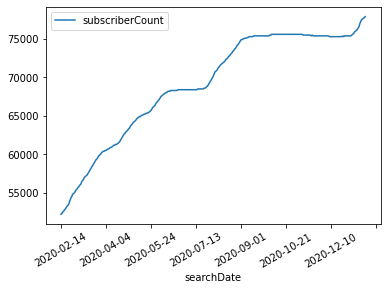

In [9]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  338
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1841.600
Method:                       css-mle   S.D. of innovations             56.131
Date:                Thu, 18 Feb 2021   AIC                           3695.200
Time:                        07:37:45   BIC                           3718.139
Sample:                             1   HQIC                          3704.342
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2151     24.619      3.258      0.001      31.963     128.467
ar.L1.D.y      0.8379      0.235      3.571      0.000       0.378       1.298
ar.L2.D.y      0.1038      0.226      0.459      0.6

## 최종 30일 예측값 시각화

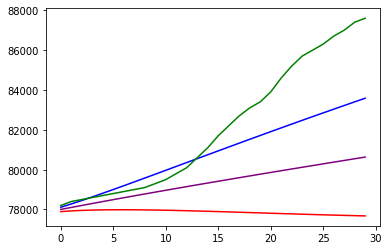

In [12]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

In [13]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

2716.48888123072


In [14]:
forecast_data[0]

array([78003.26082756, 78103.30348191, 78202.52408797, 78300.72191092,
       78397.97741448, 78494.33718903, 78589.84862385, 78684.55626233,
       78778.50234616, 78871.72689304, 78964.26781831, 79056.16104487,
       79147.44060796, 79238.13875432, 79328.28603621, 79417.91140043,
       79507.04227266, 79595.70463746, 79683.92311392, 79771.72102746,
       79859.1204778 , 79946.14240335, 80032.80664227, 80119.13199025,
       80205.13625532, 80290.83630972, 80376.2481391 , 80461.38688909,
       80546.26690944, 80630.90179588])

## 발표날까지 예측

In [15]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  368
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2056.848
Method:                       css-mle   S.D. of innovations             64.602
Date:                Thu, 18 Feb 2021   AIC                           4125.697
Time:                        07:37:46   BIC                           4149.145
Sample:                             1   HQIC                          4135.013
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.0960     38.977      2.799      0.005      32.702     185.490
ar.L1.D.y      0.5757      0.420      1.369      0.172      -0.248       1.400
ar.L2.D.y      0.3688      0.406      0.908      0.3

In [16]:
# 2021/02/16 데이터셋으로부터 발표날까지 step일 이후까지 예측
step = 9
forecast_data = model_fit.forecast(steps=step) 

In [17]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df.index[-1], periods=2)[1])[:10]

In [18]:
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

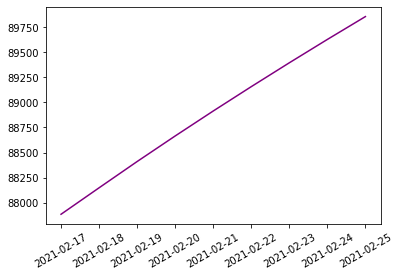

In [19]:
pred_y = forecast_data[0].astype(int).tolist() #예측 데이터

plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프

In [23]:
# 실제 예측 데이터 값
forecast_data[0].astype(int)

array([87884, 88148, 88410, 88665, 88914, 89157, 89395, 89628, 89856])

In [20]:
# 기존(과거) 데이터와 예측(미래) 데이터를 한 배열로 합침
arr = np.append(df['subscriberCount'].to_numpy(), pred_y)

In [21]:
# 날짜 데이터 배열 생성
date_arr = []
for i in range(len(arr)):
  # 날짜가 너무 많으면 보기 힘드므로 10일에 한번씩만 기록하고 나머지는 공백
  if i % 10 == 0:
    date_arr.append(str(pd.date_range(df.index[0], periods=len(arr))[i])[:10])
  else:
    date_arr.append("")

# 마지막 날짜로부터 예측일 범주까지는 비움(마지막날이랑 가까우면 그래프에서 겹쳐서 안보임)
for i in range(1,step):
  date_arr[len(date_arr)-i] = ""

# 전체 날짜 데이터 마지막 날을 예측 데이터 마지막 날로 대체
date_arr[len(date_arr)-1] = forecast_date[-1]

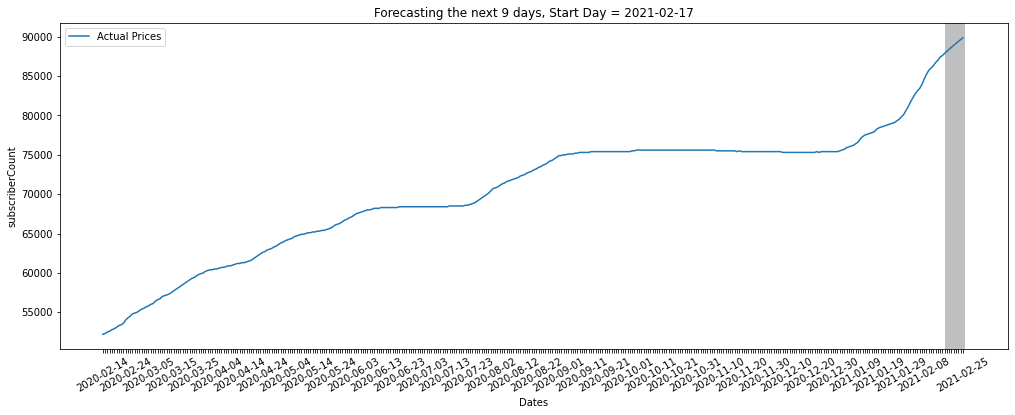

In [22]:
plt.figure(figsize=(17,6))
# 기존(과거) 데이터
plt.plot(arr, label="Actual Prices")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(pred_y)} days, Start Day = {forecast_date[0]}")
# 미래 예측 구간 강조
plt.axvspan(len(df), len(arr), facecolor='gray', alpha=0.5)
# x 축 값 이름 변경 / 회전
plt.xticks(list(range(len(arr))), date_arr, rotation = 30)
plt.legend()
plt.show()

In [37]:
import datetime
from pytz import timezone, utc

KST = timezone('Asia/Seoul')
now = datetime.datetime.utcnow()
print(utc.localize(now).astimezone(KST))

2021-02-18 17:27:07.896194+09:00
